<a href="https://colab.research.google.com/github/amanmathur19/image-classification/blob/master/catergory_classification_medium_inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm


In [4]:
train = pd.read_csv('/content/drive/Shared drives/New Markets/Aman/Project Neo/medium.csv')

In [5]:
train.columns

Index(['Unnamed: 0', 'upload_date', 'brand', 'cover_image_url', 'category'], dtype='object')

In [6]:
train['image_filename'] = train['cover_image_url'].apply((lambda x: x[-28:]))
train = train.drop(train.columns[0:3], axis = 1)
train = train.drop(train.columns[0:1], axis =1 )

In [7]:
train.head()

,category,image_filename
0,Dresses & Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses & Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses & Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses & Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses & Skirts,5e195b3693b46a0f0f3f4354.jpg


In [8]:
train['category'] = train['category'].apply(lambda x: x.replace(" ",""))
train.head()

,category,image_filename
0,Dresses&Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses&Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses&Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses&Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses&Skirts,5e195b3693b46a0f0f3f4354.jpg


In [9]:
train['category'].value_counts()

Shoes              2500
Handbags           2500
Jackets&Blazers    2500
Dresses&Skirts     2500
Name: category, dtype: int64

In [10]:
d = dict(zip(train['category'].unique(), range(0,4)))
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

In [11]:
train['category'] =  train['category'].map(d,na_action = 'ignore')
train.drop(train.columns[0], axis=1)
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [13]:
import os
img_list = os.listdir("/content/image-data-med/")
len(img_list)

8635

In [14]:
train['flag'] = train['image_filename'].apply(lambda x: True if x in img_list else False)
train_cleaned = train[train['flag'] == True]
train_cleaned.shape

(8634, 3)

In [15]:
train_cleaned.reset_index(inplace=True)
train_cleaned.head(30)

,index,category,image_filename,flag
0,0,0,5e17d1919d3b78474d296d12.jpg,True
1,1,0,5e102444138e1891a5c72ecb.jpg,True
2,2,0,5e0e754d9e1559244942bd6e.jpg,True
3,3,0,5e11196de974fbb7c1039027.jpg,True
4,4,0,5e195b3693b46a0f0f3f4354.jpg,True
5,5,0,5e1bfa6021cd0a3e6b01cf87.jpg,True
6,6,0,5e19ec99d1aa252195297706.jpg,True
7,7,0,5e1287c8b146cce6b9c1bd40.jpg,True
8,8,0,5e1a06382f48318fd1a787cb.jpg,True
9,9,0,e119fcdaa7ed32bab6583c3.jpeg,True


In [ ]:
# from google.colab import drive
# import sys
# from pathlib import Path
# drive.mount("/content/drive", force_remount=True)
# base = Path('content/drive/Shared drives/New Markets/Aman/Project Neo/')
# sys.path.append(str(base))

In [1]:
# zip_path = '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med.zip'
# !cp "{zip_path}" .
# !unzip -q image-data-med.zip
# !rm image-data-med.zip

In [16]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []

for i in tqdm(range(train_cleaned.shape[0])):
    try:
      img = image.load_img('/content/image-data-med/'+train_cleaned['image_filename'][i], target_size=(150,150,3), grayscale=False)
    except Exception as e:
      print(e)
      continue
      # print(train_cleaned['image_filename'][i])
      # train.drop(train[train['image_filename'] == train['image_filename'][i]].index,axis = 0)

    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)



100%|██████████| 8634/8634 [00:51<00:00, 166.19it/s]


In [17]:
len(train_image)

8634

# New Section

In [18]:
y=train_cleaned['category'].values
y = to_categorical(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [20]:
model_inception_v3 = InceptionV3(input_shape=(150,150,3), include_top = False, weights= 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [21]:
for layer in model_inception_v3.layers:
  layer.trainable = False

In [22]:
from keras.optimizers import RMSprop
from keras import layers
from keras import Model


In [32]:
x = layers.Flatten()(model_inception_v3.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (4, activation='softmax')(x)           

model_v3 = Model(model_inception_v3.input, x) 

model_v3.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(56,56,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(150,150,3)))
    model[j].add(MaxPooling2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    # opt = SGD(lr=0.001, momentum=0.9)
    # model[j].compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(150,150,3)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6907, 150, 150, 3)
(6907, 4)
(1727, 150, 150, 3)
(1727, 4)


In [34]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
# model_diag = model[1].fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model_diag = model_v3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
summarize_diagnostics(model_diag)


In [36]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['acc'], color='blue', label='train')
	plt.plot(history.history['val_acc'], color='orange', label='test')

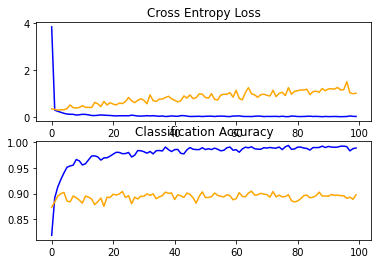

In [37]:
summarize_diagnostics(model_diag)


In [48]:
test_image = []
img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/temp.jpg',target_size=(150,150,3), grayscale=False)
img = image.img_to_array(img)
img = img/255
test_image.append(img)
test = np.array(test_image)



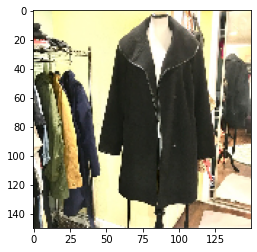

In [49]:
plt.imshow(img)

In [50]:

prediction = model_v3.predict(test)

In [51]:
prediction*100

array([[4.0442268e-07, 5.2529756e-20, 1.0000000e+02, 2.2861050e-23]],
      dtype=float32)

In [ ]:
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

## Checking Balance of dataset

In [ ]:
 try:
      img_temp = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg', target_size=(56,56,3), grayscale=False)
except Exception as e:
      print(e)

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg'


In [ ]:
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [ ]:
train.drop(train[train['image_filename'] == '5e137b40b3e9171fb0ece02e.jpg'].index,axis = 0)


,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg
...,...,...
9995,3,5e1272e72cc51543596b6a61.jpg
9996,3,5e17dd7619c1572b80f1d8a8.jpg
9997,3,5e190bf821cd0a6ca2f3e09a.jpg
9998,3,5e1515fb318740ead388740a.jpg


In [14]:
import os
img_list = os.listdir("/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/")
len(img_list)

8643

In [15]:
train['flag'] = train['image_filename'].apply(lambda x: True if x in img_list else False)

In [16]:
train['flag'] = train['image_filename'].apply(lambda x: True if x in img_list else False)
train_cleaned = train[train['flag'] == True]
train_cleaned.head()

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


In [17]:
train_cleaned.shape

(8634, 3)

In [ ]:
train_cleaned['category'].value_counts()

0    2217
2    2179
3    2159
1    2079
Name: category, dtype: int64

In [24]:
len(train_image)

8634

In [20]:
X[1]

array([[[0.5137255 , 0.44313726, 0.35686275],
        [0.7058824 , 0.62352943, 0.5411765 ],
        [0.9098039 , 0.83137256, 0.7254902 ],
        ...,
        [0.827451  , 0.7647059 , 0.6666667 ],
        [0.827451  , 0.7647059 , 0.6666667 ],
        [0.9137255 , 0.85490197, 0.7647059 ]],

       [[0.50980395, 0.4392157 , 0.3529412 ],
        [0.5921569 , 0.50980395, 0.42745098],
        [0.9098039 , 0.83137256, 0.7254902 ],
        ...,
        [0.81960785, 0.7490196 , 0.654902  ],
        [0.8156863 , 0.7607843 , 0.65882355],
        [0.9254902 , 0.8627451 , 0.7647059 ]],

       [[0.5176471 , 0.4509804 , 0.3882353 ],
        [0.54509807, 0.4745098 , 0.38039216],
        [0.9098039 , 0.83137256, 0.7254902 ],
        ...,
        [0.81960785, 0.75686276, 0.65882355],
        [0.81960785, 0.75686276, 0.65882355],
        [0.9098039 , 0.84705883, 0.7490196 ]],

       ...,

       [[0.17254902, 0.16862746, 0.16078432],
        [0.09411765, 0.09411765, 0.08627451],
        [0.03921569, 0

In [21]:
y[1]

array([1., 0., 0., 0.], dtype=float32)

In [22]:
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

In [23]:
train_cleaned.head()

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


In [52]:
# Testing

In [73]:
from PIL import Image
import requests
from io import BytesIO
url = 'https://di2ponv0v5otw.cloudfront.net/posts/2020/08/10/5f3234f7a4de41837e7e57c8/m_5f323506c693bdb927f93133.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = image.img_to_array(img)
img = img/255
test_image.append(img)
test = np.array(test_image)